# Day33 反爬：登入授權模擬
找一個需要登入的網站試試看，並說明思考流程

<!DOCTYPE html>
<html data-hairline="true" data-theme="light" lang="zh"><head><meta charset="utf-8"/><title data-react-helmet="true">知乎 - 有问题，上知乎</title><meta content="width=device-width,initial-scale=1,maximum-scale=1" name="viewport"/><meta content="webkit" name="renderer"/><meta content="webkit" name="force-rendering"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg" name="google-site-verification"/><meta content="有问题，上知乎。知乎，可信赖的问答社区，以让每个人高效获得可信赖的解答为使命。知乎凭借认真、专业和友善的社区氛围，结构化、易获得的优质内容，基于问答的内容生产方式和独特的社区机制，吸引、聚集了各行各业中大量的亲历者、内行人、领域专家、领域爱好者，将高质量的内容透过人的节点来成规模地生产和分享。用户通过问答等交流方式建立信任和连接，打造和提升个人影响力，并发现、获得新机会。" name="description" property="og:description"/><link data-react-helmet="true" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png" rel="apple-touch-icon"/><link data-react-helmet="true" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png" rel="apple-touch-icon"
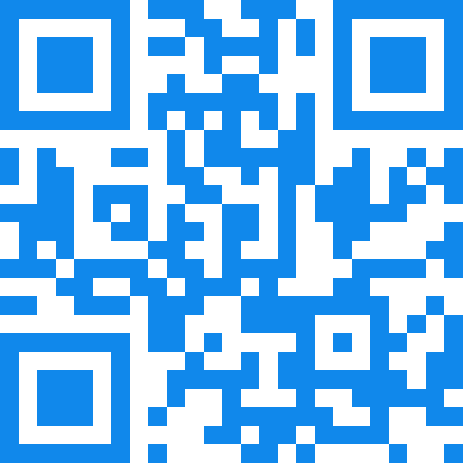

In [2]:
import requests
from bs4 import BeautifulSoup
headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}
cookies={"_xsrf":"dKCir9NtDMk0UOeCs1fMvr3jhT6jcR70",
        " _zap":"5ed3ed8e-89ea-4a3e-8a5a-dcb5a7dcdc8c",
        "d_c0":"AMCfnM4neRGPTpbDYc12GcYhfPH2kUoD4Dw=|1592968383",
        "_ga":"GA1.2.1203422419.1592968386"}

res=requests.get("https://www.zhihu.com/signin?next=%2F",headers=headers,cookies=cookies)
soup=BeautifulSoup(res.text)
print(soup)


# Day34 代理伺服器/IP
請根據 https://free-proxy-list.net/ 寫一個可自動化抓取可用 Proxy 的 proxy_ips

In [25]:
import requests, re, random
from bs4 import BeautifulSoup

In [26]:
proxy_ips=[]
res=requests.get("https://free-proxy-list.net/")
soup=BeautifulSoup(res.text)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="origin" name="referrer"/><link href="https://www.google-analytics.com" rel="dns-prefetch"/><link href="https://free-proxy-list.net/" rel="canonical"/><link href="https://cdn.datatables.net/v/bs-3.3.7/jq-3.3.1/dt-1.10.21/datatables.min.css" rel="stylesheet" type="text/css"/><link href="https://cdn.jsdelivr.net/fontawesome/4.5.0/css/font-awesome.min.css" rel="stylesheet"/><link href="https://cdnjs.cloudflare.com/ajax/libs/animate.css/3.2.0/animate.min.css" rel="stylesheet"/><link href="https://free-proxy-list.net/css/fpl20610.css" rel="stylesheet"/><link href="https://fonts.googleapis.com/css?family=Montserrat:400,600&amp;display=swap" rel="stylesheet"/><link href="https://free-proxy-list.net/favicon.ico" rel="icon"/><meta content="Here are the latest 300 free proxies that are just checked and

In [27]:
tds=soup.find_all("td")
pattern=re.compile(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}')
port=False

for td in tds:
    if port==True:
        proxy_ips.append(IP+":"+td.text)
        port=False
    if re.search(pattern, td.text) !=None:
        IP=re.search(pattern, td.text).group()
        port=True
        
print(len(proxy_ips))
proxy_ips
    


300


['185.132.249.247:8080',
 '167.71.91.204:8080',
 '191.232.234.184:8080',
 '114.6.227.28:8080',
 '154.117.143.126:8080',
 '134.249.167.184:53281',
 '189.198.250.253:80',
 '37.120.192.154:8080',
 '212.243.175.126:80',
 '196.44.67.172:53281',
 '37.220.195.14:53281',
 '112.118.48.47:3128',
 '112.78.170.27:8080',
 '34.94.90.93:3128',
 '5.166.201.211:8080',
 '119.252.160.165:3128',
 '157.245.221.254:8080',
 '140.238.17.59:80',
 '178.66.182.76:3128',
 '178.176.240.49:8080',
 '117.58.245.114:40137',
 '103.227.255.43:80',
 '41.190.95.20:56167',
 '118.172.181.147:34388',
 '91.203.114.74:54314',
 '31.134.16.168:61378',
 '31.179.224.42:35452',
 '89.218.170.58:35704',
 '175.29.190.26:50899',
 '103.250.153.242:31382',
 '42.112.34.30:3430',
 '85.10.219.99:1080',
 '114.57.49.66:53281',
 '131.161.68.37:31264',
 '89.107.197.118:53281',
 '196.3.97.86:23500',
 '94.253.15.25:41386',
 '91.207.238.107:56288',
 '103.251.57.23:60083',
 '178.218.104.42:32829',
 '36.67.246.50:41202',
 '103.21.163.81:6666',
 '45.

In [28]:
for i in range(10):
    ip=random.choice(proxy_ips)
    print("Use",ip)
    try:
        res=requests.get("http://ip.filefab.com/index.php",
                        proxies={"http":"ip","https":"ip"},timeout=10)
        soup=BeautifulSoup(res.text,"html5lib")
        print(soup.find("h1",{"id":"ipd"}).text.strip())
    except:
        print("Fail")
        

Use 35.230.21.108:80
Fail
Use 45.226.48.113:60143
Fail
Use 85.140.41.157:3128
Fail
Use 196.3.97.86:23500
Fail
Use 193.213.89.72:51024
Fail
Use 123.253.111.201:8080
Fail
Use 128.0.179.234:41258
Fail
Use 186.47.46.30:42357
Fail
Use 190.210.15.194:32302
Fail
Use 95.131.113.60:8080
Fail
